In [1]:
import pandas as pd
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot


In [2]:
#Pandas as pd: Imports the pandas library for handling and analyzing structure statsmodels.graphics.tsaplots as tsa_plots:
#Imports time-series plotting functions such as ACF (Autocorrelation function) and PACF (Partial Autocorrelation Function).
#from statsmodels.tsa.arima.model import ARIMA:Imports the ARIMA model for time-series forecasting.
#from sklearn.metrics import mean_squares_error:Imports the mean squared error function

In [3]:
walmart=pd.read_csv("C:/Data Set/Walmart_Footfalls_Raw.csv")
#Data Partition
Train=walmart.head(147)
Test=walmart.tail(12)

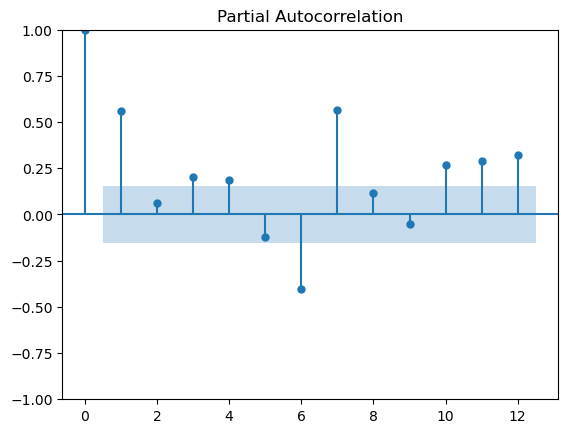

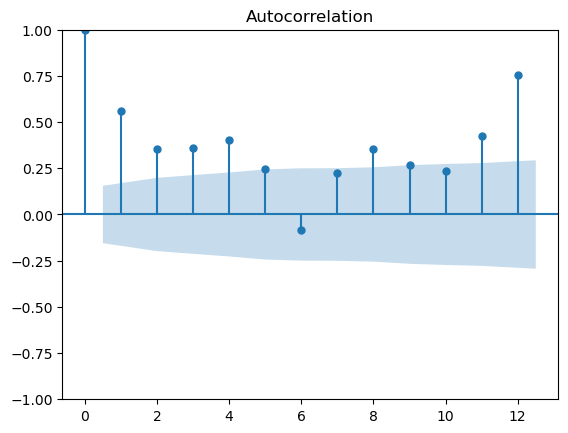

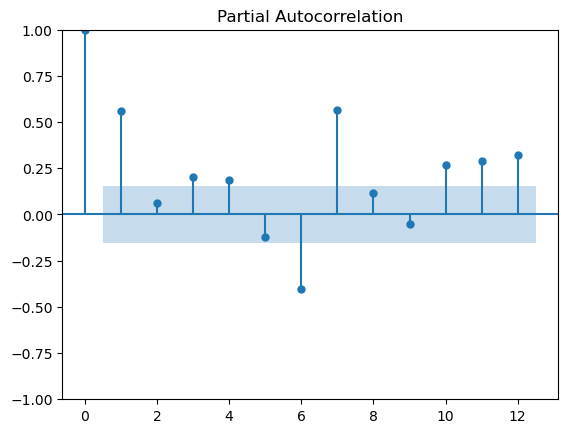

In [4]:
tsa_plots.plot_acf(walmart.Footfalls, lags=12)
tsa_plots.plot_pacf(walmart.Footfalls, lags=12)

In [6]:
#When analyzing ACF and PACF, we follow these rules:
#AR order (p) from PACF:
#Look at the partial Autocorrelation Function(PACF) plot,
#The number of significant lags before the PACF drops to near zerosuggest the AR order.
#If PACF shows a sharp cutoff after lag 4, we take AR(4).
#MA order (q) from ACF:
    
#Look at the Autocorrelation function(ACF) PLOT.
#The number of significant lags before the ACF drops to near zero suggests
#If ACF shows a sharp cutoff after lag 6, we take MA(6).

#First you try p=4 and q=4
#Then you try p=4 and q=6

In [7]:
#creates an ARIMA model with:
#ARIMA with AR=4,MA=6
model1=ARIMA(Train.Footfalls, order=(4,1,6))
res1 = model1.fit()
print(res1.summary())

                               SARIMAX Results                                
Dep. Variable:              Footfalls   No. Observations:                  147
Model:                 ARIMA(4, 1, 6)   Log Likelihood                -895.376
Date:                Thu, 30 Jan 2025   AIC                           1812.753
Time:                        16:19:33   BIC                           1845.572
Sample:                             0   HQIC                          1826.088
                                - 147                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7360      1.129     -0.652      0.515      -2.950       1.478
ar.L2         -0.7697      0.459     -1.675      0.094      -1.670       0.131
ar.L3         -0.7265      1.129     -0.644      0.5

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#Create an ARIMA model with:
#Ar(Auto-Regressive)term = 4
#I(Integrated) team = 1(indicates first order differencing to make the date stationary)
#MA(Moving Average)team = 6

#When to Use Differencing(d in ARIMA)
#Before selecting p and q,ensure the time series is stationary:

#If the mean and varience change over time, apply diierencing.
#Use the Argument Dickey-Fuller(ADF)test to check for stationary.
#If the series is not stationary,apply first-order diiferencing(d=1)

#from statsmodel.tsa.stattools import adfuller
#result = adfuller(Walmart.Footfalls)
#print('p-value:',result[1])

#If p-value > 0.05, the series is not stationary,so apply diierencing(d=

In [8]:
#Forecast for next 12 months
start_index=len(Train)
end_index=start_index + 11
forecast_test = res1.predict(start=start_index,end=end_index)
print(forecast_test)

147    1927.149645
148    1864.014233
149    1862.521471
150    2020.370675
151    1984.084335
152    1831.137013
153    1856.600443
154    2018.674598
155    1982.473251
156    1830.280707
157    1858.325382
158    2018.840100
Name: predicted_mean, dtype: float64


In [9]:
#start_index =len(Train):Begins prediction after the training dataset.
#end_index = start_index = 11:predict thr next 12 periods.
#res1.predict(start_index,end=end_index):Generates forecast.


In [27]:
#Evaulate forecasts
rmse_test = sqrt(mean_squared_error(Test.Footfalls,forecast_test))
rmse_test

172.67405827390252

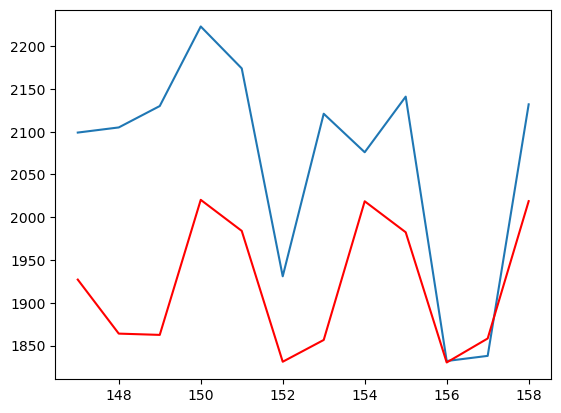

In [11]:
#Plot forecasts against actual outcomes
pyplot.plot(Test.Footfalls)
pyplot.plot(forecast_test,color='red')
pyplot.show()

In [12]:
#Auto-ARIMA - Automatically discover thr optimal order for an ARIMA Model
#pip install pmdarima --user

In [13]:
#pmdarima is an Auto-ARIMA paage that automatically select the best(p,q)
#start_p=0,start q=0: Initial values for AP and MA teams.
#max_p=12,max_q=12:Maximum values for AR and MA.
#m=1: Indicates a non-seasonal model.
#d=Npne: Automatically determine the differencing order.
#seasonal=Flase: Disables seasonal components.
#trace=True: Displays the selection process.
#stepwise=True: Uses a stepwise approach for efficiently.

In [17]:
import pmdarima as pm
ar_model = pm.auto_arima(Train.Footfalls, start_p=0, start_q = 0, max_p = 12, max_q=12, m=1, d=None, seasonal=False, start_P=0, trace = True, error_action = 'warn', stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1916.696, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1908.134, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1887.358, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1914.726, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1874.405, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1875.051, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1874.985, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1873.101, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1874.951, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1869.771, Time=0.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1859.122, Time=0.57 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1853.611, Time=0.73 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=1

In [19]:
#Best Parameters ARIMA
#ARIMA with AR=3,I=1,MA =5
model=ARIMA(Train.Footfalls,order = (3,1,5))
res=model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:              Footfalls   No. Observations:                  147
Model:                 ARIMA(3, 1, 5)   Log Likelihood                -894.770
Date:                Thu, 30 Jan 2025   AIC                           1807.541
Time:                        16:28:45   BIC                           1834.393
Sample:                             0   HQIC                          1818.452
                                - 147                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4538      0.259      1.755      0.079      -0.053       0.961
ar.L2         -0.9929      0.013    -76.838      0.000      -1.018      -0.968
ar.L3          0.4581      0.261      1.755      0.0

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
#Forecast for next 12 months
start_index = len(Train)
end_index= start_index + 11
forecast_best = res1.predict(start = start_index,end = end_index)
print(forecast_best)

147    1927.149645
148    1864.014233
149    1862.521471
150    2020.370675
151    1984.084335
152    1831.137013
153    1856.600443
154    2018.674598
155    1982.473251
156    1830.280707
157    1858.325382
158    2018.840100
Name: predicted_mean, dtype: float64


In [22]:
#Evaulate forecasts
rmse_best = sqrt(mean_squared_error(Test.Footfalls, forecast_best))
print('Test RMSE: %.3f' %rmse_best)

Test RMSE: 172.674


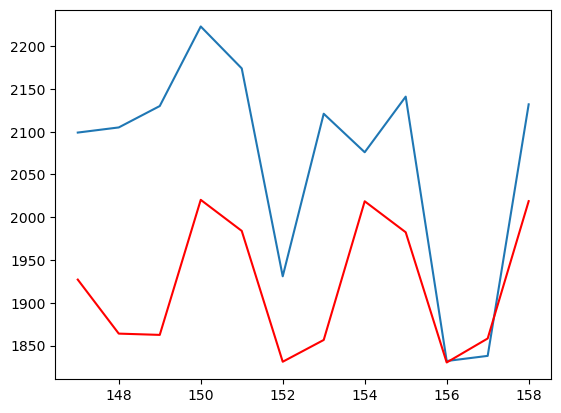

In [26]:
#plot forecasts against actual outcomes
pyplot.plot(Test.Footfalls)
pyplot.plot(forecast_best,color='red')
pyplot.show()